In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv('downloads/creditcard.csv.zip')[:80_000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [2]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values
f"Shapes of X={X.shape} y={y.shape}, #Fraud Cases={y.sum()}"

'Shapes of X=(80000, 28) y=(80000,), #Fraud Cases=196'

In [3]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(class_weight={0: 1, 1: 2},max_iter=1000)
mod.fit(X, y).predict(X).sum()

172

In [10]:
from sklearn.ensemble import IsolationForest
mod = IsolationForest().fit(X)
np.where(mod.predict(X) == -1,1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.ensemble import IsolationForest
#def min_recall_precision(est, X, y_true, sample_weight=None): what this did was only dect 0,1 but the isloation forest thinks in -1 and 1 
#    y_pred = est.predict(X)
#    recall = recall_score(y_true,y_pred)
#   precision = precision_score(y_true,y_pred)
#    return min(recall,precision)

def outlier_precision(mod,X,y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds == -1 ,1, 0))

def outlier_recall(mod,X,y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds == -1 ,1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid={'contamination': np.linspace(.001, .02,10)},
    scoring={'precision': outlier_precision, 
             'recall': outlier_recall},
    refit='precision',
    #return_train_score=True,
    cv=5,
    n_jobs=-1
)
grid.fit(X,y)
#grid.fit(X,y, sample_weight=np.log(1 + df['Amount']))

GridSearchCV(cv=5, estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])},
             refit='precision',
             scoring={'precision': <function outlier_precision at 0x00000260A46A4860>,
                      'recall': <function outlier_recall at 0x00000260A46A54E0>})

In [5]:
#f(y-true,y-pred) --> s(est,X,y, w(sample))
# what make_scorer funct does

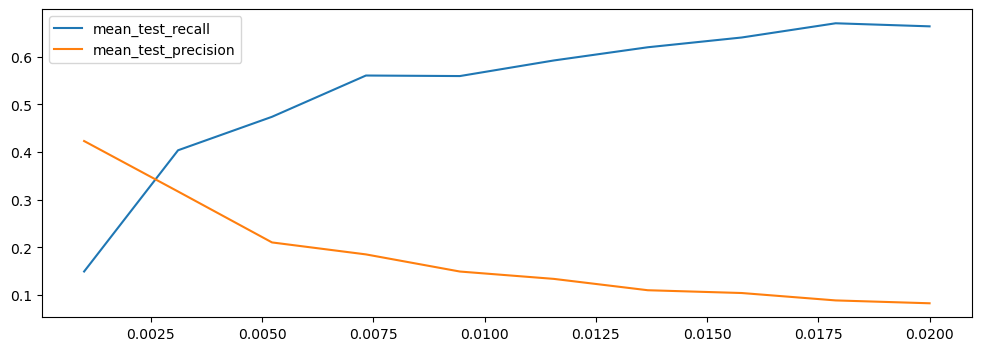

In [16]:
plt.figure(figsize=(12,4))
df_results = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall', 'mean_test_precision']: #, 'mean_test_min_both'
    #plt.plot([_[1] for _ in df['param_class_weight']],
     #        df[score],
      #       label=score)
    plt.plot(df_results['param_contamination'],
             df_results[score],label=score)
plt.legend()

In [7]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred)
    return min(recall,precision)

make_scorer(min_recall_precision,greater_is_better=False)

In [8]:
pd.DataFrame(grid.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_min_both,split3_train_min_both,split4_train_min_both,split5_train_min_both,split6_train_min_both,split7_train_min_both,split8_train_min_both,split9_train_min_both,mean_train_min_both,std_train_min_both
0,0.574946,0.133212,0.028267,0.007783,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.000000,0.463415,0.583333,1.000000,...,0.581921,0.536723,0.585227,0.551136,0.556818,0.607955,0.636364,0.613636,0.602571,0.054944
1,0.684566,0.118405,0.025023,0.004928,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.463415,0.583333,1.000000,...,0.655367,0.593220,0.630682,0.585227,0.585227,0.636364,0.676136,0.647727,0.647323,0.065977
2,0.834412,0.148107,0.040391,0.019421,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.452381,0.583333,1.000000,...,0.728814,0.610169,0.642045,0.625000,0.613636,0.653409,0.681818,0.664773,0.672249,0.064057
3,0.786011,0.185958,0.028109,0.007517,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.441860,0.538462,1.000000,...,0.762712,0.655367,0.704545,0.676136,0.670455,0.687500,0.715909,0.676136,0.709113,0.052579
4,0.746000,0.194646,0.030588,0.015672,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.431818,0.538462,1.000000,...,0.785311,0.711864,0.732955,0.721591,0.710227,0.721591,0.761364,0.727273,0.745975,0.043530
5,0.841830,0.211427,0.028265,0.007917,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.422222,0.538462,1.000000,...,0.813559,0.740113,0.778409,0.767045,0.750000,0.755682,0.786517,0.738636,0.775708,0.035052
6,0.845850,0.221577,0.028373,0.008138,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.413043,0.538462,1.000000,...,0.830508,0.779661,0.795455,0.789773,0.778409,0.784091,0.788889,0.761364,0.795462,0.026838
7,0.759812,0.152966,0.024966,0.009441,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.413043,0.538462,1.000000,...,0.837079,0.792135,0.800000,0.800000,0.784530,0.797753,0.794595,0.784091,0.804694,0.024392
8,0.841198,0.136589,0.030925,0.018712,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",1.000000,0.404255,0.538462,0.944444,...,0.838889,0.793478,0.804348,0.801105,0.786885,0.802198,0.801047,0.798883,0.808043,0.023178
9,0.820169,0.102875,0.045167,0.031488,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",1.000000,0.404255,0.518519,0.947368,...,0.825137,0.789189,0.806452,0.802198,0.788043,0.798913,0.792746,0.801105,0.805366,0.020845
